In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import numpy as np
import scanpy as sc
import matplotlib.pyplot as plt
import os
import sys

In [4]:
import STAGATE
import scanpy as sc

In [5]:
file = ''
adata = sc.read_visium(file, count_file=r'GSE198353_mmtv_pymt_GEX_filtered_feature_bc_matrix.h5',load_images=True)
adata.var_names_make_unique()

In [6]:
adata

AnnData object with n_obs × n_vars = 1978 × 32286
    obs: 'in_tissue', 'array_row', 'array_col'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'

In [7]:
adata.obs

,in_tissue,array_row,array_col
AAACAAGTATCTCCCA-1,1,50,102
AAACACCAATAACTGC-1,1,59,19
AAACAGGGTCTATATT-1,1,47,13
AAACAGTGTTCCTGGG-1,1,73,43
AAACATGGTGAGAGGA-1,1,62,0
...,...,...,...
TTGTTGGCAATGACTG-1,1,76,30
TTGTTTCACATCCAGG-1,1,58,42
TTGTTTCATTAGTCTA-1,1,60,30
TTGTTTCCATACAACT-1,1,45,27


In [8]:
adata.var

,gene_ids,feature_types,genome
Xkr4,ENSMUSG00000051951,Gene Expression,MMTV_PyMT_gex-mm10-2020-A
Gm1992,ENSMUSG00000089699,Gene Expression,MMTV_PyMT_gex-mm10-2020-A
Gm19938,ENSMUSG00000102331,Gene Expression,MMTV_PyMT_gex-mm10-2020-A
Gm37381,ENSMUSG00000102343,Gene Expression,MMTV_PyMT_gex-mm10-2020-A
Rp1,ENSMUSG00000025900,Gene Expression,MMTV_PyMT_gex-mm10-2020-A
...,...,...,...
AC133095.2,ENSMUSG00000095475,Gene Expression,MMTV_PyMT_gex-mm10-2020-A
AC133095.1,ENSMUSG00000094855,Gene Expression,MMTV_PyMT_gex-mm10-2020-A
AC234645.1,ENSMUSG00000095019,Gene Expression,MMTV_PyMT_gex-mm10-2020-A
AC149090.1,ENSMUSG00000095041,Gene Expression,MMTV_PyMT_gex-mm10-2020-A


In [9]:
adata.uns

OrderedDict([('spatial',
              {'ST_CITE2_1C_GE_pymt_gex_output': {'images': {'hires': array([[[0.00392157, 0.01176471, 0.14117648],
                         [0.00392157, 0.01176471, 0.13725491],
                         [0.00784314, 0.01176471, 0.14509805],
                         ...,
                         [0.01176471, 0.01176471, 0.14509805],
                         [0.01176471, 0.01176471, 0.14509805],
                         [0.01176471, 0.01176471, 0.14509805]],
                 
                        [[0.00392157, 0.01176471, 0.13725491],
                         [0.00784314, 0.01176471, 0.13725491],
                         [0.00784314, 0.01176471, 0.14117648],
                         ...,
                         [0.01176471, 0.01176471, 0.14509805],
                         [0.00784314, 0.01176471, 0.14117648],
                         [0.01176471, 0.01176471, 0.14509805]],
                 
                        [[0.00392157, 0.01176471, 0.13725491],
     

In [10]:
adata.obsm['spatial']

array([[4802, 3916],
       [1589, 4563],
       [1346, 3755],
       ...,
       [2017, 4625],
       [1888, 3614],
       [2454, 5498]], dtype=int64)

In [11]:
adata

AnnData object with n_obs × n_vars = 1978 × 32286
    obs: 'in_tissue', 'array_row', 'array_col'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'

In [12]:
#Normalization
sc.pp.highly_variable_genes(adata, flavor="seurat_v3", n_top_genes=3000)
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

In [13]:
from sklearn.metrics.cluster import adjusted_rand_score

------Calculating spatial graph...
The graph contains 22532 edges, 1978 cells.
11.3913 neighbors per cell on average.


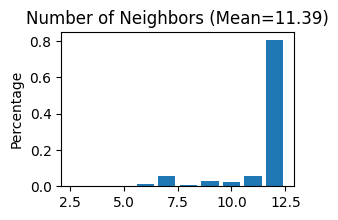

In [14]:
STAGATE.Cal_Spatial_Net(adata, rad_cutoff=150)
STAGATE.Stats_Spatial_Net(adata)

In [15]:
adata = STAGATE.train_STAGATE(adata, alpha=0)

Size of Input:  (1978, 3000)


100%|██████████| 500/500 [01:33<00:00,  5.34it/s]


In [16]:
r"C:\Users\KARAN\AppData\Local\R\win-library\4.3\spatialLIBD\data"

'C:\\Users\\KARAN\\AppData\\Local\\R\\win-library\\4.3\\spatialLIBD\\data'

In [17]:
os.environ['R_HOME'] = r"C:\Program Files\R\R-4.3.0"
os.environ['R_USER'] = r"C:\Users\KARAN\anaconda3\envs\STAGATE_PT\Lib\site-packages\rpy2"


In [26]:
sc.pp.neighbors(adata, use_rep='STAGATE')
sc.tl.umap(adata)
adata = STAGATE.mclust_R(adata, used_obsm='STAGATE', num_cluster=8)

fitting ...
  |======================================================================| 100%


In [27]:
adata = STAGATE.mclust_R(adata, used_obsm='STAGATE', num_cluster=8)
obs_df = adata.obs.dropna()


fitting ...
  |======================================================================| 100%


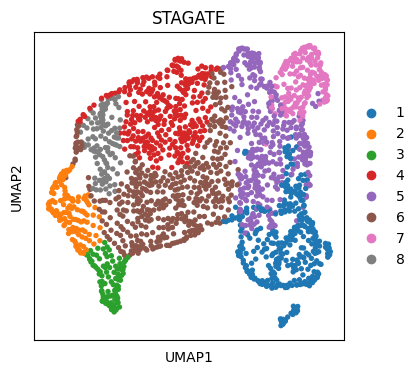

In [28]:
plt.rcParams["figure.figsize"] = (4, 4)
sc.pl.umap(adata, color=["mclust"], title=['STAGATE'])

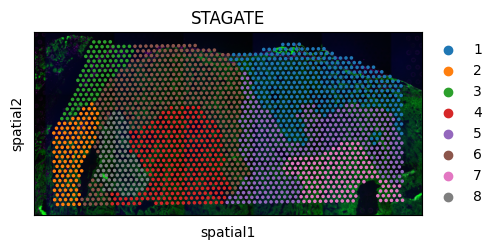

In [29]:
plt.rcParams["figure.figsize"] = (5, 5)
sc.pl.spatial(adata, color=["mclust"], title=['STAGATE'])

In [30]:
sc.pp.neighbors(adata, use_rep='STAGATE')
sc.tl.umap(adata)
adata = STAGATE.mclust_R(adata, used_obsm='STAGATE', num_cluster=4)

fitting ...
  |======================================================================| 100%


In [34]:
adata = STAGATE.mclust_R(adata, used_obsm='STAGATE', num_cluster=4)
obs_df = adata.obs.dropna()


fitting ...
  |======================================================================| 100%


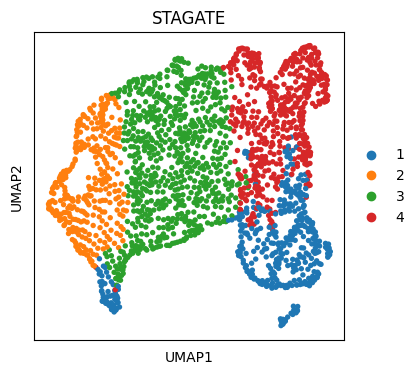

In [35]:
plt.rcParams["figure.figsize"] = (4, 4)
sc.pl.umap(adata, color=["mclust"], title=['STAGATE'])

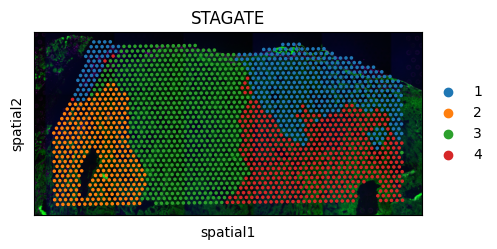

In [36]:
plt.rcParams["figure.figsize"] = (5, 5)
sc.pl.spatial(adata, color=["mclust"], title=['STAGATE'])

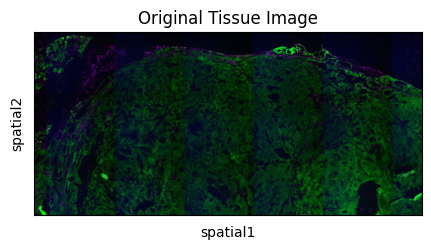

In [38]:
sc.pl.spatial(adata,  title=['Original Tissue Image'])